In [9]:
# !pip install geopandas


Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import os
import arcpy
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd


In [2]:
os.chdir("..") # return to the main directory
home_wd = os.getcwd()
home_wd

'c:\\Users\\milan\\OneDrive - MUNI\\VŠ\\PhD\\Zahraniční stáž\\Work\\HeiGIT_notebooks\\analysis\\ai-assisted-osm-mapping-stats'

In [4]:
in_cont = os.path.join(home_wd, r"shp\continents_borders.shp")
in_af = os.path.join(home_wd, r"shp\africa-states-borders.shp")
in_na = os.path.join(home_wd, r"shp\northamerica-states-borders.shp")
out_af = os.path.join(home_wd, r"geojson-africa-states", "")
out_na = os.path.join(home_wd, r"geojson-northamerica-states", "")
out_cont = os.path.join(home_wd, r"geojson-continent-borders", "")

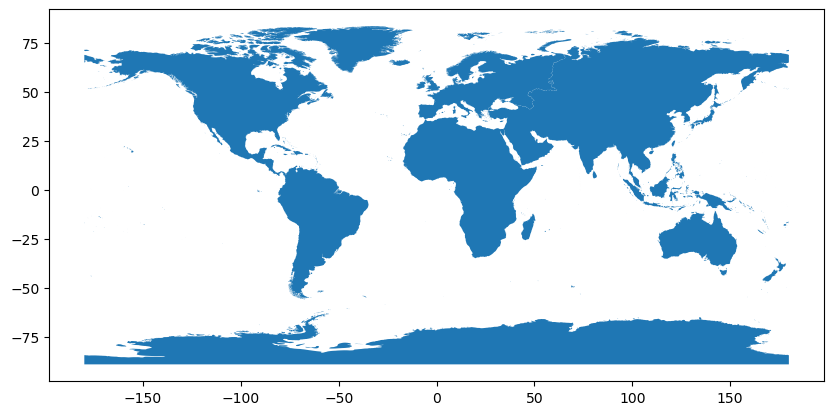

In [5]:
# Load the shapefile using GeoPandas
data = gpd.read_file(in_cont)

# Plot the shapefile using GeoPandas
fig, ax = plt.subplots(figsize=(10, 10))
data.plot(ax=ax)
plt.show()


In [7]:
arcpy.Exists(in_cont)


True

In [8]:
flds = [str(f.name) for f in arcpy.ListFields(in_cont)]
for idx, fld in enumerate(flds):
    print(idx, fld)

0 FID
1 Shape
2 FID_1
3 CONTINENT
4 SQMI
5 SQKM
6 Shape__Are
7 Shape__Len


In [10]:
# Use a search cursor to iterate through the rows of the table and create a list of dictionaries

with arcpy.da.SearchCursor(in_cont, flds) as cur:
    for row in cur:
        data.append(dict(zip(flds, row)))

# Create a Pandas DataFrame from the list of dictionaries
df = pd.DataFrame(data)
df.head()


,FID,Shape,FID_1,CONTINENT,SQMI,SQKM,Shape__Are,Shape__Len
0,0,"(18.27661539655144, 6.426117314564521)",1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07
1,1,"(95.75037372272722, 44.947896179636146)",2,Asia,1.731728e+07,4.485173e+07,1.145290e+14,3.111768e+08
2,2,"(134.48956326882595, -25.734968813342554)",3,Australia,2.973612e+06,7.701651e+06,9.652152e+12,2.996954e+07
3,3,"(-92.3204358141082, 56.51520973908668)",4,North America,9.339528e+06,2.418936e+07,1.113144e+14,5.951525e+08
4,4,"(152.78107866507003, -31.065923004764784)",5,Oceania,1.656787e+05,4.291076e+05,6.581670e+11,2.617752e+07


In [12]:
with arcpy.da.SearchCursor(in_cont, flds) as cur:
    for row in cur:
        region_lst = [row[3]]
        id_lst = [row[0]]
        reg_id_dic = {k:v for k,v in zip(region_lst, id_lst)}
        for region in region_lst:
            field = arcpy.AddFieldDelimiters(in_cont, "CONTINENT")
            selection = "{field} = '{val}'".format(field=field, val=region)
            selected = arcpy.management.SelectLayerByAttribute(
                in_cont, "NEW_SELECTION", selection)
            arcpy.conversion.FeaturesToJSON(selected, f"{out_cont}{reg_id_dic[region]}_{region}.geojson", geoJSON=True)
            print(f"{selection} was exported")

"CONTINENT" = 'Africa' was exported
"CONTINENT" = 'Asia' was exported
"CONTINENT" = 'Australia' was exported
"CONTINENT" = 'North America' was exported
"CONTINENT" = 'Oceania' was exported
"CONTINENT" = 'South America' was exported
"CONTINENT" = 'Antarctica' was exported
"CONTINENT" = 'Europe' was exported
